#**Task 3: Anomaly detection**
##**3.1.Import the libraries**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

###Firstly, I've select the Multi-dimensional point datasets, Lymphography dataset, 

#### Dataset information

The original lymphography dataset from UCI machine learning repository is a classification dataset. It is a multi-class dataset having four classes, but two of them are quite small (2 and 4 data records). Therefore, those two small classes are merged and considered as outliers compared to other two large classes (81 and 61 data records).

## **3.2. Upload the data**

In [ ]:
data1 = loadmat('/content/drive/MyDrive/Colab Notebooks/lympho.mat')

In [ ]:
y1 = data1['y']
x1 = data1['X']
print(x1.shape)
print(y1.shape)

(148, 18)
(148, 1)


#**Let's put the data in a dataframe**

In [ ]:
df = pd.DataFrame(x1, columns=['x1', 'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18'])

##**Description: X = multi-dimensional point data, y = labels (1 = outliers, 0 = inliers)**



In [ ]:
dfy = pd.DataFrame(y1, columns=['y'])# dataframe contains only the outliers checker
df_all = pd.concat([df,dfy],axis=1)

In [ ]:
np.unique(dfy.values)

array([0., 1.])

In [ ]:
dfy.head(3)

,y
0,1.0
1,1.0
2,1.0


In [ ]:
df_all.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
2,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,8.0,1.0,2.0,2.0,4.0,1.0


In [ ]:
df_all.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,y
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351,0.040541
std,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023,0.197893
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000,0.000000
max,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000,1.000000


## **Let's look at the outliers**
##**Description: X = multi-dimensional point data, y = labels (1 = outliers, 0 = inliers)**


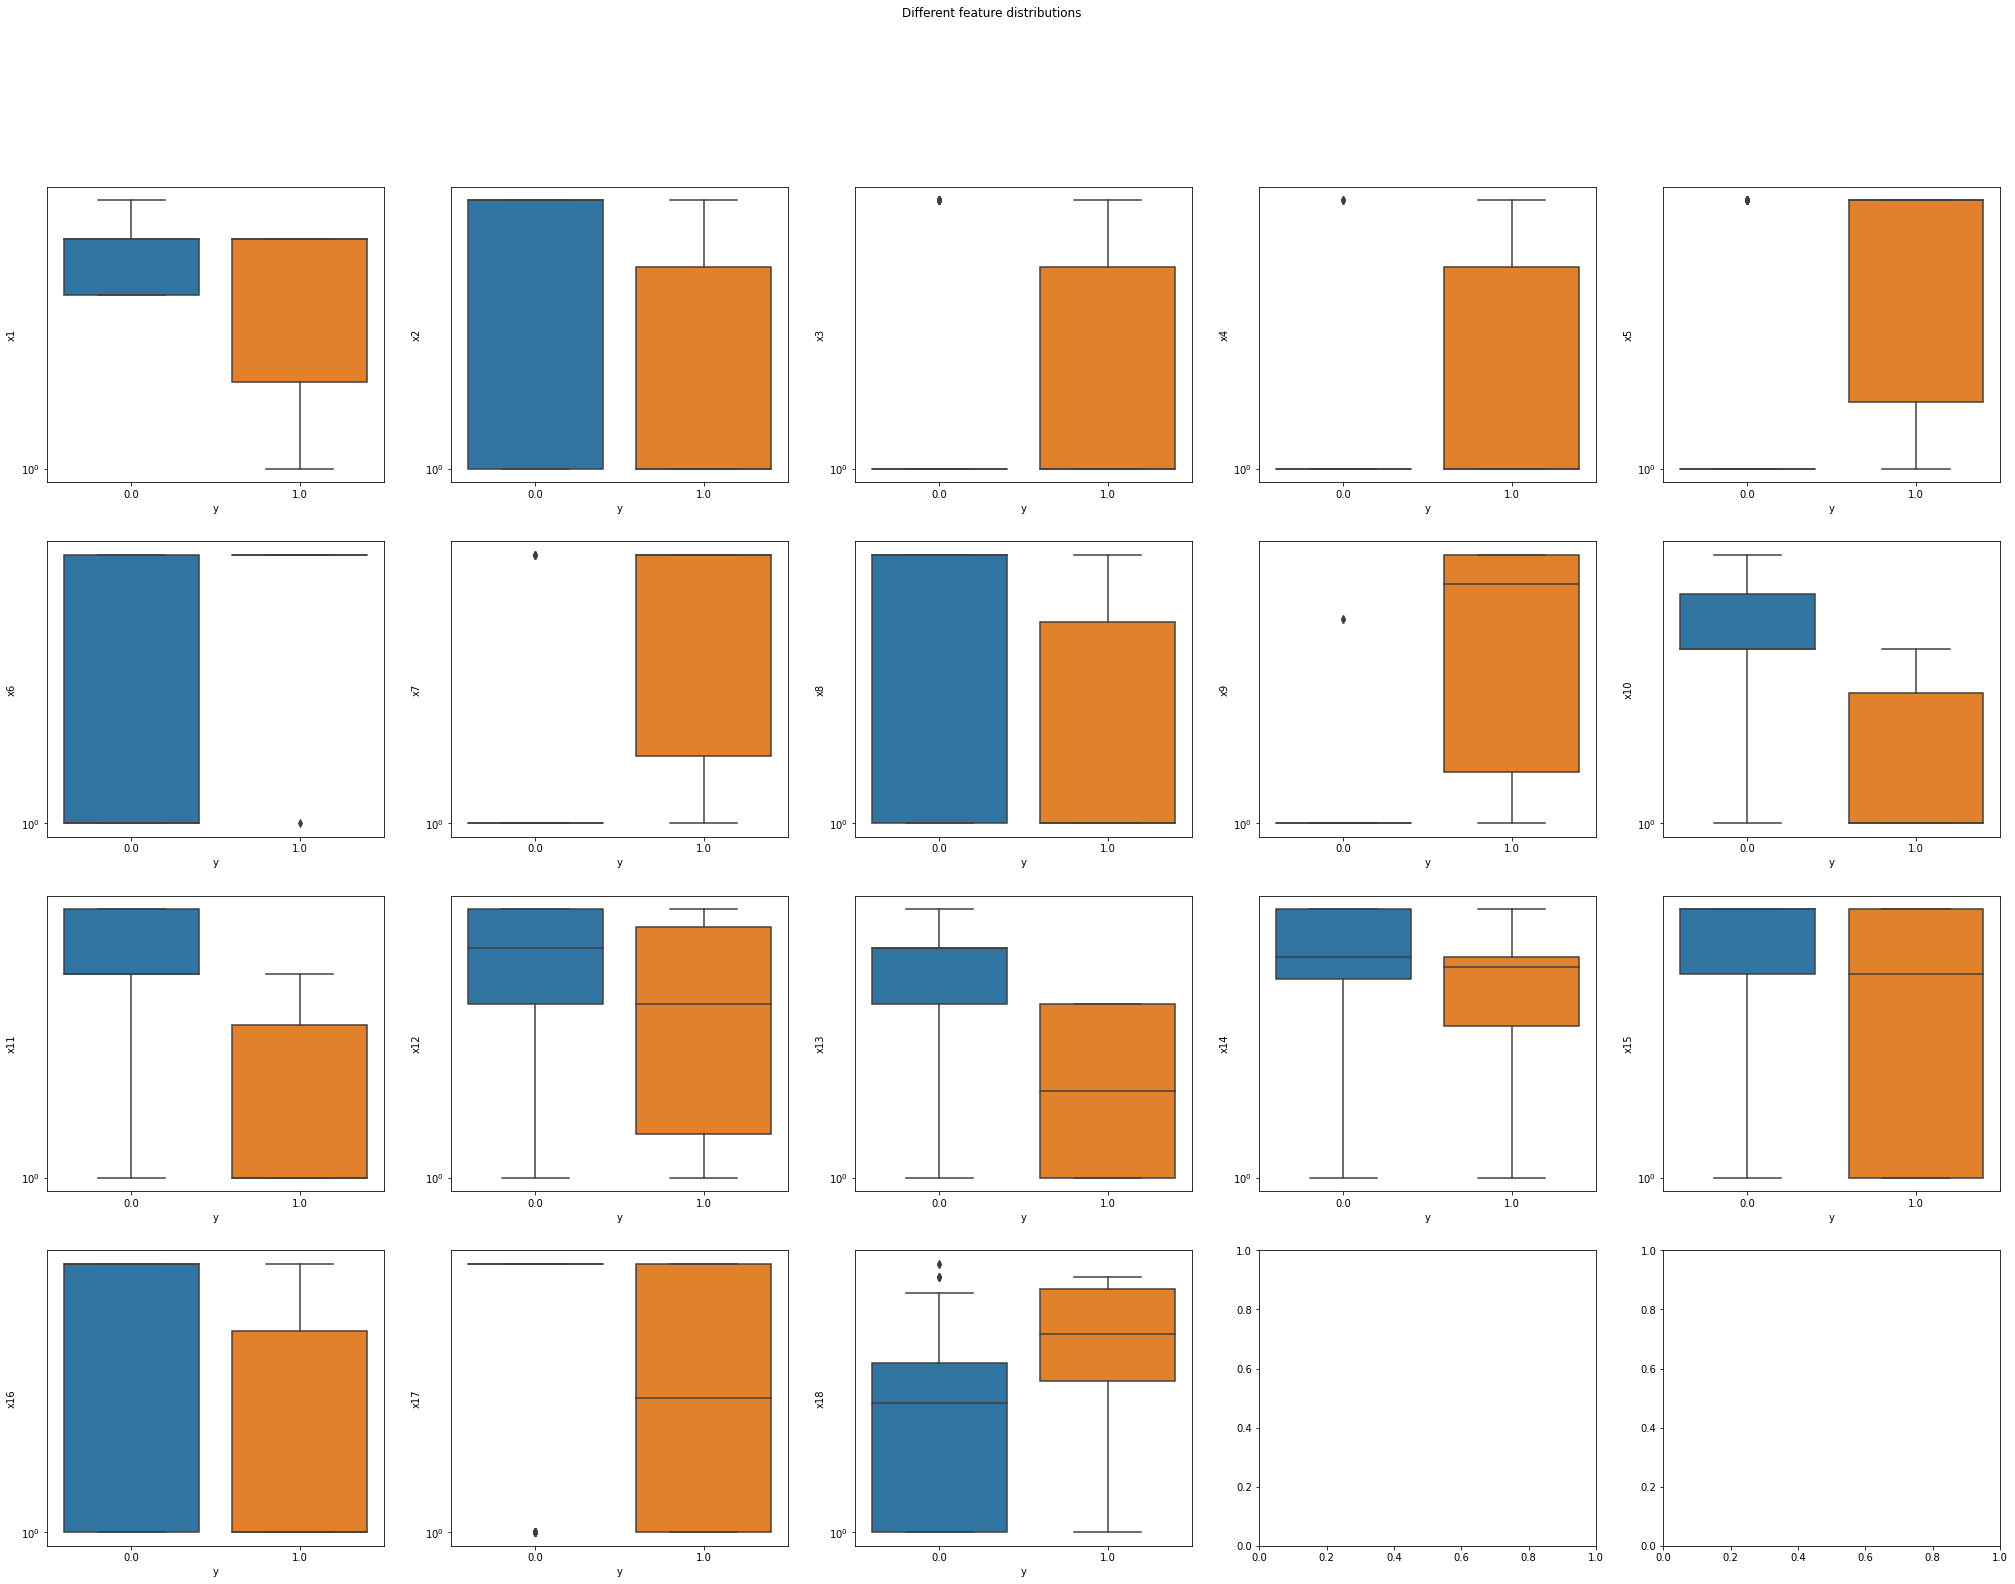

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(35, 25))
fig.suptitle('Different feature distributions')

axes = axes.reshape(20,)

for i,column in enumerate(df_all.columns[:-1]):
    axes[i].set_yscale('symlog')
    sns.boxplot(ax = axes[i],x="y", y=column,data=df_all)

##**3.3. Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,dfy, test_size=0.33, random_state=1, shuffle=True)

In [ ]:
X_train.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18
119,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,5.0,3.0,2.0,2.0,3.0
144,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,6.0
105,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0


In [ ]:
len(X_test)

49

#**What is GMM?**
Gaussian Mixture Model(GMM) is an Unsupervised Clustering approach. In this approach, unlike K-Means we fit ‘k’ Gaussians to the data. Then we find the Gaussian distribution parameters like mean and Variance for each cluster and weight of a cluster. Finally, for each data point, we calculate the probabilities of belonging to each of the clusters.
Mathematically, the Gaussian model can be written as follows:

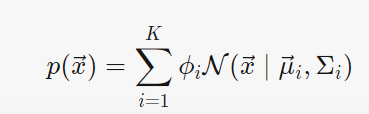

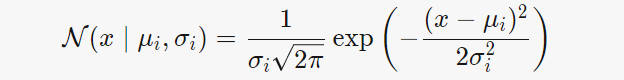


where μ​k = mean & Σk​ = covariance matrix for the kth component. ϕk= weight for the cluster ‘k’.

#**3.4. Apply GMM**

In [ ]:
gm = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0) #n_components=gaussian components
                                                                                 #/mixture components=num of clusters= 1 by default
                             #covariance_type = 'full':means the components may independently adopt any position and shape.
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
c=gm.predict_proba(X_test)

In [ ]:
c[:4]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.67086122e-12, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
GMM_y_pre = gm.predict(X_test)
GMM_y_pre

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0])

#**3.5. Benchmark the outlier detection model against a supervised approach (Logestic Regression LR).**
##The chosen metric is AUC 
##**What is AUC?**
Compute Area Under the Curve (AUC) using the trapezoidal rule.
This is a general function, given points on a curve. For computing the area under the ROC-curve where it is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.


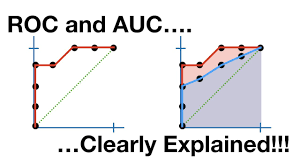

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.



##**3.6 Apply the LR**

In [ ]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=42,max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_y_pred = LogisticRegressionModel.predict(X_test)

##**3.7 Compute AUC for both models**

In [ ]:
GMM_fpr, GMM_tpr, GMM_thresholds = metrics.roc_curve(y_test, GMM_y_pre)
print('GMM AUC :',metrics.auc(GMM_fpr, GMM_tpr)) #False Positive Rate=FP/(FP+TN)
                                                 #True Positive Rate=TP/(TP+FN)

GMM AUC : 0.9787234042553191


In [ ]:
LR_fpr, LR_tpr, LR_thresholds = metrics.roc_curve(y_test, LR_y_pred)
print('LR AUC :',metrics.auc(LR_fpr, LR_tpr))

LR AUC : 0.75


##**AUC Score of GGM is 0.97 and Logistic Regression Model is 0.75 so the GMM is better that LR with Anomaly Detection**

##**Resources have been used:**
http://odds.cs.stonybrook.edu/lympho/?fbclid=IwAR0LGJDFkII3g83oSY0Yu_olKLG9Vm2E_M9cish_6x1MWKDSUXS1LmNw64E